Make Jupyter cells as wide as possible

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Import Python modules

In [25]:
import sys
import pandas as pd
import os
import platform
import matplotlib.pyplot as plt
print(platform.python_version())

3.6.4


# Define directory 
Set the directory to read motion files from.<br>
This directory should contain a set of sub-directories where the name matches the motion label.<br>
Each sub-directory contains a set of comma-separated (.csv) files each containing a single captured motion.

In [58]:
modelName = 'twoBNOTest' #to be used for exporting graphs and the trained ML model
rootDir = 'C:/Users/user/Dropbox/ShareIrene/ScienceFair/Experiments/DataFiles'
test1 = '20180614_0811'
test2 = '20180615_0929'
test3 = '20180615_0942'

dataName = test3
dataRootDir = os.path.join(rootDir, dataName)

# Process csv file functions

The main function 'read_csv_files' loops through the sub-directories of the root and reads the .csv files.<br>
It calls the functions 'add_csv_df' and 'prepare_csv_df' to convert the motion data into a single DataFrame that can be processed by the SKLearn toolkit.

### read_csv_files function
This procedure starts from a root directory and loops over each sub-directory.<br>
Each sub-directory represents one class of motions. The directory name is the label for this motion.<br>
Each sub-directory contains a set of .csv files. Each .csv file is one captured motion.<br>
It returns a DataFrame where each motion is one row.

In [59]:
# motions_dict = {}
def read_csv_files(rootDir):
    df_list = []
    for dirName, subdirList, fileList in os.walk(rootDir):
        if dirName == rootDir:
            motionName = ''
        else:
            head, motionName = os.path.split(dirName) #split removes the directory separator, so we don't need to do this by replacing '\' or '/'
        if len(motionName) > 0:
#             print('Motion: %s' % motionName)
            for fname in fileList:
                filename, file_extension = os.path.splitext(fname)
                #Only consider csv files
                if file_extension.lower() == '.csv':   
                    csv_file = os.path.join(dirName, fname)
                    fileSize = os.path.getsize(csv_file)
                    dataName = fname.replace('.CSV', '')
#                     print('\t%s, size = %i, data = %s' % (fname, fileSize, dataName))
                    if (fileSize > 0):
                        df = pd.read_csv(csv_file)
                        if len(df.index) >= 48:
                            df = df.head(48)
                            if not df.isnull().values.any():
                                add_csv_df(df_list, df, dataName, motionName)
                            else:
                                print('Found null values')
                        else :
                            print('Less than 49 samples: ' + fname)
    all_df = pd.concat(df_list)
    all_df.columns.names = ['sample','qt']
    if all_df.isnull().values.any():
        print ("NULL")
    return all_df

### add_csv_df function
Adds a DataFrame representing a single .csv file to the list 'df_list'.<br>

In [60]:
def add_csv_df(df_list, csv_df, dataName, motion):
    df = prepare_csv_df(csv_df, dataName, motion)
    if df.isnull().values.any():
        print("Null values")
    df_list.append(prepare_csv_df(csv_df, dataName, motion))
#     return none

### prepare_csv_df function
Takes the raw csv data, extracts the quaternions, stacks the sampled data in one column and then transposes it to a single row.

In [61]:
def prepare_csv_df(csv_df, dataName, motion):
    #1. Extract quaternion columns from csv_df
    df = csv_df[['quat_w','quat_x','quat_y','quat_z', 'quat_w2','quat_x2','quat_y2','quat_z2']]
    #2. Transpose (stack)
    df = pd.DataFrame(df.stack())
    #3. Name data column (multi-index)
    columns = [(motion,dataName)]
    df.columns = pd.MultiIndex.from_tuples(columns)
    #4. Transpose
    df = df.T
    df.index.names = ['motion', 'dataName']
    return df

# Read the motions from file

In [62]:
all_df = read_csv_files(dataRootDir)
all_df.head(10)

sample                 0                                                   \
qt                 quat_w  quat_x  quat_y  quat_z quat_w2 quat_x2 quat_y2   
motion   dataName                                                           
Big Wave DATA0     0.9496 -0.1432 -0.1221  0.2508  0.9585 -0.0559 -0.1276   
         DATA1     0.8104 -0.1152 -0.3583  0.4490  0.0494 -0.3055 -0.0738   
         DATA2     0.8243 -0.0848 -0.3837  0.4077  0.0030 -0.2930 -0.1208   
         DATA3     0.8243 -0.0180 -0.3199  0.4667  0.0573 -0.2360 -0.0414   
         DATA4     0.9130 -0.0847  0.1435  0.3724 -0.0007  0.5850 -0.0080   
         DATA5     0.8930 -0.0206 -0.0457  0.4472  0.0242  0.5844 -0.0360   
         DATA6     0.8864 -0.1024  0.0353  0.4501  0.0014  0.5244 -0.0126   
         DATA7     0.8702 -0.1332  0.0950  0.4646  0.0417  0.5274 -0.0367   
         DATA8     0.8546 -0.2084  0.1049  0.4641  0.0488  0.5060 -0.0156   
         DATA9     0.7076 -0.1518 -0.4364  0.5346  0.0072 -0.1874  0.0009   

sample                         1            ...        46              47  \
qt                quat_z2  quat_w  quat_x   ...   quat_y2 quat_z2  quat_w   
motion   dataName                           ...                             
Big Wave DATA0    -0.2489  0.9514 -0.1392   ...    0.0159 -0.8956  0.7344   
         DATA1    -0.9480  0.8126 -0.1067   ...   -0.0389 -0.9379  0.7983   
         DATA2    -0.9484  0.8298 -0.0605   ...   -0.0347 -0.9241  0.7913   
         DATA3    -0.9692  0.8223  0.0015   ...   -0.0507 -0.9335  0.7630   
         DATA4    -0.8110  0.9116 -0.1229   ...   -0.0966 -0.9527  0.7459   
         DATA5    -0.8104  0.8925 -0.0715   ...   -0.0189 -0.8373  0.8768   
         DATA6    -0.8514  0.8874 -0.1102   ...   -0.0674 -0.8525  0.8661   
         DATA7    -0.8478  0.8724 -0.1448   ...   -0.0139 -0.8544  0.8527   
         DATA8    -0.8610  0.8557 -0.2155   ...   -0.0930 -0.8524  0.8459   
         DATA9    -0.9822  0.7129 -0.1249   ...   -0.0801 -0.9661  0.7122   

sample                                                                     
qt                 quat_x  quat_y  quat_z quat_w2 quat_x2 quat_y2 quat_z2  
motion   dataName                                                          
Big Wave DATA0    -0.2764 -0.4470  0.4294  0.0561 -0.4678  0.0037 -0.8820  
         DATA1    -0.1655 -0.4281  0.3900  0.0110 -0.3664 -0.0623 -0.9283  
         DATA2    -0.1036 -0.3825  0.4656  0.0602 -0.3729 -0.0292 -0.9254  
         DATA3    -0.1031 -0.3877  0.5068  0.0629 -0.3289 -0.0582 -0.9405  
         DATA4     0.0033 -0.4355  0.5040 -0.0045 -0.2845 -0.0978 -0.9537  
         DATA5    -0.1033  0.0646  0.4653  0.0031  0.5361 -0.0144 -0.8441  
         DATA6    -0.0956  0.0886  0.4825  0.0327  0.5270 -0.0479 -0.8479  
         DATA7    -0.2154  0.1165  0.4614  0.0404  0.5163  0.0019 -0.8555  
         DATA8    -0.1471  0.0675  0.5082  0.0670  0.5051 -0.0931 -0.8553  
         DATA9    -0.0101 -0.4028  0.5749 -0.0563 -0.2433 -0.0915 -0.9640  

[10 rows x 384 columns]

# Prepare machine learning data
Convert the motions into the X (input) matrix and Y (output) vector

In [63]:
X = all_df
X.head()

sample                 0                                                   \
qt                 quat_w  quat_x  quat_y  quat_z quat_w2 quat_x2 quat_y2   
motion   dataName                                                           
Big Wave DATA0     0.9496 -0.1432 -0.1221  0.2508  0.9585 -0.0559 -0.1276   
         DATA1     0.8104 -0.1152 -0.3583  0.4490  0.0494 -0.3055 -0.0738   
         DATA2     0.8243 -0.0848 -0.3837  0.4077  0.0030 -0.2930 -0.1208   
         DATA3     0.8243 -0.0180 -0.3199  0.4667  0.0573 -0.2360 -0.0414   
         DATA4     0.9130 -0.0847  0.1435  0.3724 -0.0007  0.5850 -0.0080   

sample                         1            ...        46              47  \
qt                quat_z2  quat_w  quat_x   ...   quat_y2 quat_z2  quat_w   
motion   dataName                           ...                             
Big Wave DATA0    -0.2489  0.9514 -0.1392   ...    0.0159 -0.8956  0.7344   
         DATA1    -0.9480  0.8126 -0.1067   ...   -0.0389 -0.9379  0.7983   
         DATA2    -0.9484  0.8298 -0.0605   ...   -0.0347 -0.9241  0.7913   
         DATA3    -0.9692  0.8223  0.0015   ...   -0.0507 -0.9335  0.7630   
         DATA4    -0.8110  0.9116 -0.1229   ...   -0.0966 -0.9527  0.7459   

sample                                                                     
qt                 quat_x  quat_y  quat_z quat_w2 quat_x2 quat_y2 quat_z2  
motion   dataName                                                          
Big Wave DATA0    -0.2764 -0.4470  0.4294  0.0561 -0.4678  0.0037 -0.8820  
         DATA1    -0.1655 -0.4281  0.3900  0.0110 -0.3664 -0.0623 -0.9283  
         DATA2    -0.1036 -0.3825  0.4656  0.0602 -0.3729 -0.0292 -0.9254  
         DATA3    -0.1031 -0.3877  0.5068  0.0629 -0.3289 -0.0582 -0.9405  
         DATA4     0.0033 -0.4355  0.5040 -0.0045 -0.2845 -0.0978 -0.9537  

[5 rows x 384 columns]

In [64]:
Y = all_df.reset_index()['motion']
Y.head()

0    Big Wave
1    Big Wave
2    Big Wave
3    Big Wave
4    Big Wave
Name: motion, dtype: object

Check for any 'null' values. Nulls cause trouble in the learning algorithm and need to be avoided.

In [65]:
X.isnull().values.any()

False

In [66]:
Y.isnull().values.any()

False

# Learn
1. Label encoding
2. Split data set into a train and test set
3. Train GaussianNB model and test
4. Train RandomForrest model and test

## Label Encoding
We need to map the textual values of the predicted labels to a number.

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y)
le.classes_

array(['Big Wave', 'Small Wave'], dtype=object)

## Split into a train and test set

In [68]:
# split the data to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

## GaussianNB

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbModel = gnb.fit(X_train, y_train)
y_pred = gnbModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 18 points : 0


In [70]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = gnbModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00         9



## Detailed report on test data
For each item in the test set, get the detailed (probability-based) prediction and compare with actual data.

In [71]:
y_prediction_proba = gnbModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Big Wave,Small Wave,correct,predicted,actual
0,0.0,1.0,True,Small Wave,Small Wave
1,1.0,0.0,True,Big Wave,Big Wave
2,0.0,1.0,True,Small Wave,Small Wave
3,0.0,1.0,True,Small Wave,Small Wave
4,1.0,0.0,True,Big Wave,Big Wave
5,0.0,1.0,True,Small Wave,Small Wave
6,1.0,0.0,True,Big Wave,Big Wave
7,0.0,1.0,True,Small Wave,Small Wave
8,0.0,1.0,True,Small Wave,Small Wave


Plot probability data in histogram

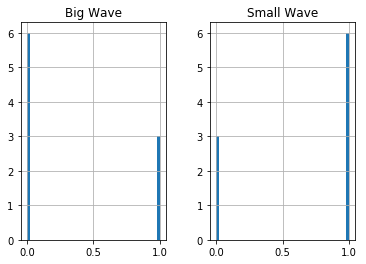

In [72]:
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## RandomForrest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdfModel = rdf.fit(X_train, y_train)
y_pred = rdfModel.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 18 points : 0


In [74]:
from sklearn.metrics import classification_report
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = rdfModel.predict( X_test )
### test your predictions using sklearn.classification_report()
report = classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00         9



In [75]:
y_prediction_proba = rdfModel.predict_proba(X_test)
df = pd.DataFrame(y_prediction_proba, columns = le.classes_)
df['correct']=(y_prediction == y_test)
df['predicted']=le.inverse_transform(y_prediction)
df['actual']=le.inverse_transform(y_test)
df

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Big Wave,Small Wave,correct,predicted,actual
0,0.0,1.0,True,Small Wave,Small Wave
1,0.9,0.1,True,Big Wave,Big Wave
2,0.0,1.0,True,Small Wave,Small Wave
3,0.0,1.0,True,Small Wave,Small Wave
4,0.9,0.1,True,Big Wave,Big Wave
5,0.0,1.0,True,Small Wave,Small Wave
6,1.0,0.0,True,Big Wave,Big Wave
7,0.0,1.0,True,Small Wave,Small Wave
8,0.0,1.0,True,Small Wave,Small Wave


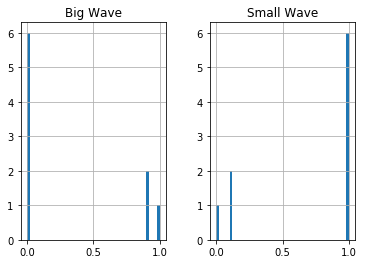

In [76]:
# df[df.columns[1]].hist(bins=50)
df2 = df.drop(['correct', 'predicted', 'actual'], axis=1)
df2.hist(bins=50)
plt.show()

## Save model

In [77]:
from sklearn.externals import joblib
joblib.dump(rdfModel, modelName + '.pkl') 

['twoBNOTest.pkl']

In [78]:
import pickle
pickle.dump(le, open(modelName + '.le', 'wb'))

# Plotting
Plot all motion data by quaternion.
Allows for a visual comparision of how close the motions are.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

In [80]:
def getMultiMotions(X, qtName, motionName):
    '''qt is the name of the quaternion (e.g. 'quat_w'). motionName is the name of the motion (e.g. 'Curl_90degree'). 
    Should match the names of the indices of df X.
    Returns a df with multiple time-series of the quaternion of the motion type'''
    
    df = X.xs(qtName, level='qt', axis=1)\
        .xs(motionName, level='motion', axis=0)\
        .reset_index()\
        .drop(['dataName'], axis = 1)
    return df

In [81]:
def plotMotion2D(X, motionNames):
    numMotions = len(motionNames)
    fig, axes = plt.subplots(nrows=numMotions, ncols=4, figsize=(20, numMotions*4))
#     fig.suptitle(motionName, fontsize=20)
    for motionIdx in range(0,numMotions):
        motionName = motionNames[motionIdx]
        for qtIdx in range(0,4):
            axes[motionIdx][qtIdx].set_autoscaley_on(False)
            axes[motionIdx][qtIdx].set_ylim([-1,1])
        
        axes[motionIdx][0].set_ylabel(motionName)
        axes[motionIdx][0].set_title('w')
        axes[motionIdx][1].set_title('x')
        axes[motionIdx][2].set_title('y')
        axes[motionIdx][3].set_title('z')
        axes[motionIdx][0].plot(getMultiMotions(X, 'quat_w', motionName).T, '#9933ff')
        axes[motionIdx][1].plot(getMultiMotions(X, 'quat_x', motionName).T, '#9933ff')
        axes[motionIdx][2].plot(getMultiMotions(X, 'quat_y', motionName).T, '#9933ff')
        axes[motionIdx][3].plot(getMultiMotions(X, 'quat_z', motionName).T, '#9933ff')
        axes[motionIdx][0].plot(getMultiMotions(X, 'quat_w2', motionName).T, '#73e600')
        axes[motionIdx][1].plot(getMultiMotions(X, 'quat_x2', motionName).T, '#73e600')
        axes[motionIdx][2].plot(getMultiMotions(X, 'quat_y2', motionName).T, '#73e600')
        axes[motionIdx][3].plot(getMultiMotions(X, 'quat_z2', motionName).T, '#73e600')
    return fig

In [82]:
motionNames = X.index.levels[0].tolist()
motionNames

['Big Wave', 'Small Wave']

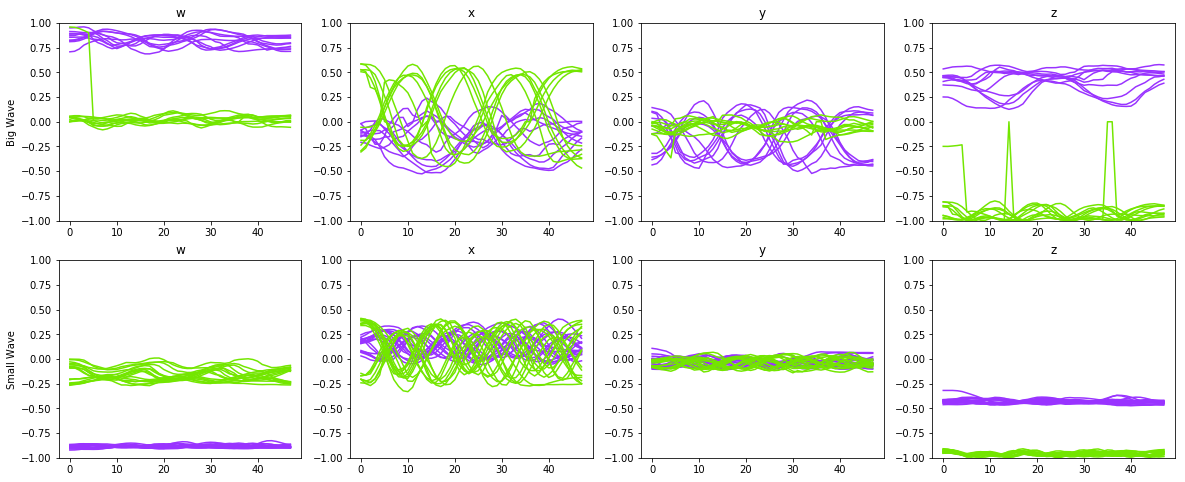

In [83]:
plotMotion2D(X, motionNames)
plt.savefig('Handoid-Motions-'+modelName+'.png')
plt.show()

# Evaluate
Evaluate whole dataset from previously saved model

In [71]:
modelName = 'portDeBras_v2' #previously saved model
evaluateMotions = 'uniqueMotions'
dataRootDir = os.path.join(rootDir, evaluateMotions) #Uses the same rootDir

Read model using 'joblib'

In [72]:
evalModel = joblib.load(modelName + '.pkl') 

Read back LabelEncoder using 'pickle'

In [73]:
evalLE = pickle.load(open(modelName + '.le', 'rb'))

Read the data

In [74]:
X_eval = read_csv_files(dataRootDir)
Y_eval = X_eval.reset_index()['motion']
X_eval.head(10)

sample                      0                               1           \
qt                      quat_w  quat_x  quat_y  quat_z  quat_w  quat_x   
motion        dataName                                                   
Curl_90degree DATA0    -0.4968  0.4646  0.3141 -0.6623 -0.4977  0.4440   
              DATA1    -0.4685  0.4519  0.2859 -0.7032 -0.4783  0.4315   
              DATA10   -0.5858  0.4354  0.3359 -0.5955 -0.5982  0.4217   
              DATA11   -0.5681  0.4307  0.2999 -0.6339 -0.5832  0.4154   
              DATA12   -0.5953  0.4124  0.2927 -0.6244 -0.6054  0.3964   
              DATA13   -0.6444  0.3477  0.2029 -0.6501 -0.6537  0.3321   
              DATA14   -0.5931  0.4186  0.3132 -0.6122 -0.6033  0.4050   
              DATA15   -0.5585  0.4313  0.3514 -0.6153 -0.5681  0.4178   
              DATA16   -0.6050  0.4005  0.3098 -0.6146 -0.6147  0.3884   
              DATA17   -0.6006  0.3908  0.3140 -0.6228 -0.6130  0.3758   

sample                                      2            ...        45  \
qt                      quat_y  quat_z  quat_w  quat_x   ...    quat_y   
motion        dataName                                   ...             
Curl_90degree DATA0     0.2955 -0.6840 -0.5044  0.4164   ...    0.3179   
              DATA1     0.2693 -0.7159 -0.4878  0.4163   ...    0.2977   
              DATA10    0.3153 -0.6041 -0.6136  0.4026   ...    0.3187   
              DATA11    0.2780 -0.6403 -0.5972  0.4012   ...    0.2734   
              DATA12    0.2642 -0.6376 -0.6199  0.3776   ...    0.2914   
              DATA13    0.1815 -0.6553 -0.6655  0.3132   ...    0.3209   
              DATA14    0.2921 -0.6219 -0.6158  0.3909   ...    0.3021   
              DATA15    0.3314 -0.6268 -0.5787  0.4038   ...    0.3253   
              DATA16    0.2912 -0.6217 -0.6245  0.3768   ...    0.3159   
              DATA17    0.2986 -0.6276 -0.6199  0.3657   ...    0.3282   

sample                              46                              47  \
qt                      quat_z  quat_w  quat_x  quat_y  quat_z  quat_w   
motion        dataName                                                   
Curl_90degree DATA0    -0.6750 -0.4850  0.4585  0.3273 -0.6689 -0.4784   
              DATA1    -0.6968 -0.4617  0.4651  0.3069 -0.6901 -0.4576   
              DATA10   -0.6069 -0.5744  0.4479  0.3278 -0.6017 -0.5677   
              DATA11   -0.6371 -0.5731  0.4360  0.2910 -0.6299 -0.5678   
              DATA12   -0.6292 -0.5823  0.4216  0.3031 -0.6255 -0.5756   
              DATA13   -0.6041 -0.5837  0.4354  0.3304 -0.6004 -0.5772   
              DATA14   -0.6229 -0.5923  0.4095  0.3176 -0.6169 -0.5843   
              DATA15   -0.6151 -0.5701  0.4335  0.3340 -0.6128 -0.5637   
              DATA16   -0.6330 -0.5769  0.4105  0.3251 -0.6269 -0.5740   
              DATA17   -0.5886 -0.6096  0.4172  0.3389 -0.5828 -0.6038   

sample                                          
qt                      quat_x  quat_y  quat_z  
motion        dataName                          
Curl_90degree DATA0     0.4664  0.3358 -0.6639  
              DATA1     0.4728  0.3153 -0.6838  
              DATA10    0.4562  0.3369 -0.5968  
              DATA11    0.4427  0.3058 -0.6229  
              DATA12    0.4280  0.3121 -0.6230  
              DATA13    0.4420  0.3387 -0.5974  
              DATA14    0.4178  0.3289 -0.6130  
              DATA15    0.4400  0.3431 -0.6091  
              DATA16    0.4170  0.3334 -0.6209  
              DATA17    0.4259  0.3517 -0.5747  

[10 rows x 192 columns]

Evaluate the data based on a saved model.

In [75]:
evalLE.classes_

array(['Early_FsSeFtFs', 'Late_FsSeFtFs', 'OnTime_FsSeFtFs',
       'Slow_FsSeFtFs'], dtype=object)

In [76]:
y_prediction = evalModel.predict(X_eval)
y_prediction_proba = evalModel.predict_proba(X_eval)
df = pd.DataFrame(y_prediction_proba, columns = evalLE.classes_)
df['predicted']=evalLE.inverse_transform(y_prediction)
df['actual']=Y_eval
df['correct']=(df['predicted']==df['actual'])
df.head(10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Early_FsSeFtFs,Late_FsSeFtFs,OnTime_FsSeFtFs,Slow_FsSeFtFs,predicted,actual,correct
0,0.1,0.0,0.2,0.7,Slow_FsSeFtFs,Curl_90degree,False
1,0.2,0.0,0.2,0.6,Slow_FsSeFtFs,Curl_90degree,False
2,0.1,0.0,0.1,0.8,Slow_FsSeFtFs,Curl_90degree,False
3,0.1,0.0,0.2,0.7,Slow_FsSeFtFs,Curl_90degree,False
4,0.1,0.0,0.1,0.8,Slow_FsSeFtFs,Curl_90degree,False
5,0.1,0.0,0.1,0.8,Slow_FsSeFtFs,Curl_90degree,False
6,0.1,0.0,0.2,0.7,Slow_FsSeFtFs,Curl_90degree,False
7,0.1,0.0,0.2,0.7,Slow_FsSeFtFs,Curl_90degree,False
8,0.1,0.0,0.2,0.7,Slow_FsSeFtFs,Curl_90degree,False
9,0.1,0.0,0.2,0.7,Slow_FsSeFtFs,Curl_90degree,False
